# House Price Bangalore

In [105]:
# Importing required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

In [106]:
# Loading the dataset
df = pd.read_csv("house_price.csv")

# to sow first 5 rows
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


# 1 Basic EDA

In [107]:
# To find shape of dataset
print("shape:", df.shape)

shape: (13200, 7)


In [46]:
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [48]:
# To get summary of dataset
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [50]:
# For Data type
print(df.dtypes)

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [52]:
# To find unique values in categorical columns
print(df.select_dtypes(include='object').nunique())

location    241
size         31
dtype: int64


# 2 Detect and remove outliers using different methods

In [54]:
# A. Mean & Standard Deviation

mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# To keep data within +/- 3*std
df_trimmed_std =df[(df['price_per_sqft'] >=(mean - 3*std)) & (df['price_per_sqft'] <= (mean+ 3*std))]

In [56]:
print("Original Data Shape:", df.shape)
print("Filtered Data Shape (Mean ± 3*STD):", df_trimmed_std.shape)

# Checking how many rows were removed
print("Outliers Removed:", df.shape[0] - df_trimmed_std.shape[0])

Original Data Shape: (13200, 7)
Filtered Data Shape (Mean ± 3*STD): (13195, 7)
Outliers Removed: 5


In [121]:
# B. Percentile method

low = df['price_per_sqft'].quantile(0.05)
high = df['price_per_sqft'].quantile(0.95)

df_drimmed_percentile = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]

print("\nOrginal data shape:", df.shape)
print("Filtered data shape:", df_drimmed_percentile.shape[0])
print("Outliers Removed:", df.shape[0]-df_drimmed_percentile.shape[0])


Orginal data shape: (13200, 7)
Filtered data shape: 11880
Outliers Removed: 1320


In [64]:
# C. IQR method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR= Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

df_trimmed_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

print("\nOrginal data shape:", df.shape)
print("Filtered data shape:", df_trimmed_iqr.shape[0])
print("Outliers Removed:", df.shape[0]-df_trimmed_iqr.shape[0])


Orginal data shape: (13200, 7)
Filtered data shape: 230
Outliers Removed: 12970


In [66]:
# D. Z-Score Method

z_scores = zscore(df['price_per_sqft'])
df_trimmed_z = df[(np.abs(z_scores) <3)]


print("\nOrginal data shape:", df.shape)
print("Filtered data shape:", df_trimmed_z.shape[0])
print("Outliers Removed:", df.shape[0]-df_trimmed_z.shape[0])


Orginal data shape: (13200, 7)
Filtered data shape: 13195
Outliers Removed: 5


# 3 Using box plot to determine which method seems to work best

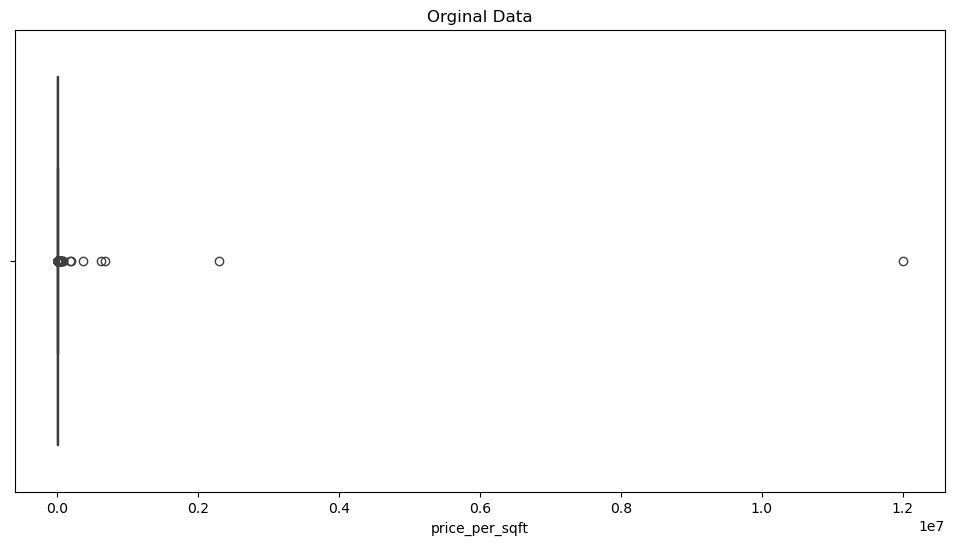

In [78]:
plt.figure(figsize=(12,6))

# Orginal Data
sns.boxplot(x=df['price_per_sqft'])
plt.title("Orginal Data")
plt.show()



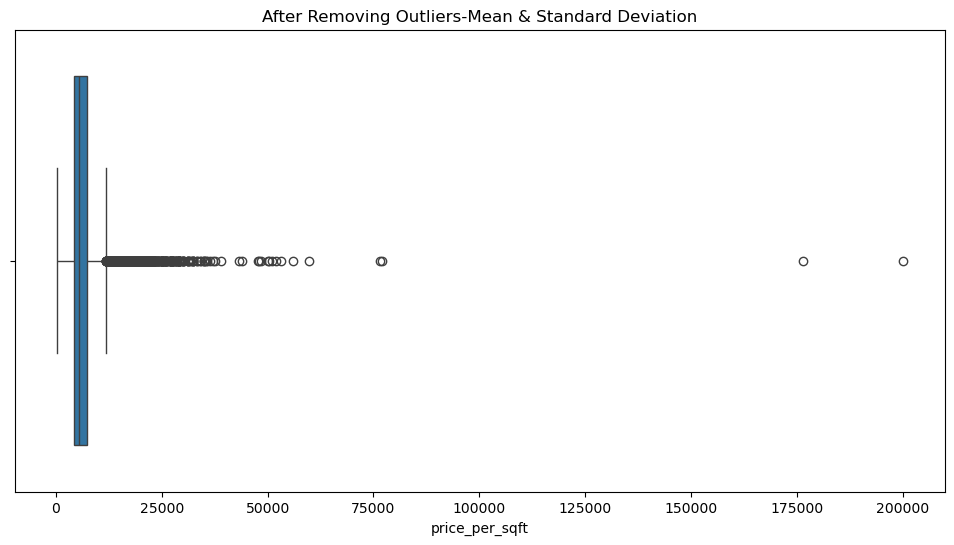

In [72]:
# After Mean & Standard Deviation
plt.figure(figsize=(12,6))

sns.boxplot(x=df_trimmed_std['price_per_sqft'])
plt.title("After Removing Outliers-Mean & Standard Deviation")
plt.show()

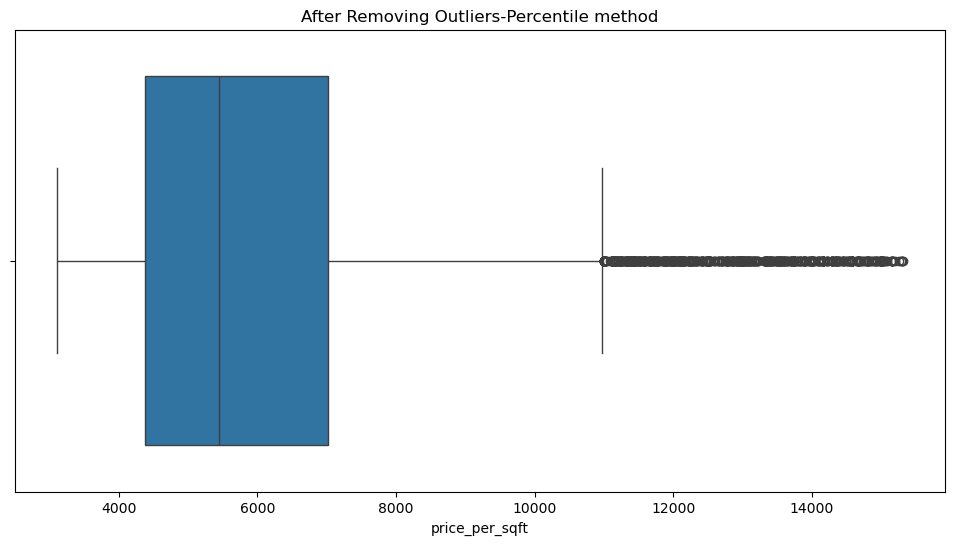

In [123]:
# After Percentile method

plt.figure(figsize=(12,6))

sns.boxplot(x=df_drimmed_percentile['price_per_sqft'])
plt.title("After Removing Outliers-Percentile method")
plt.show()

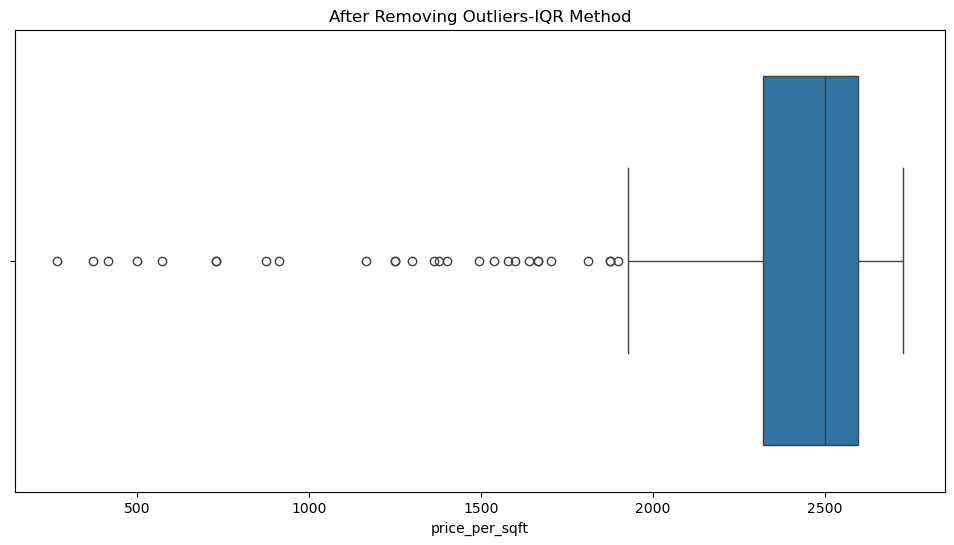

In [82]:
# After IQR
plt.figure(figsize=(12,6))
sns.boxplot(x=df_trimmed_iqr['price_per_sqft'])
plt.title("After Removing Outliers-IQR Method")
plt.show()


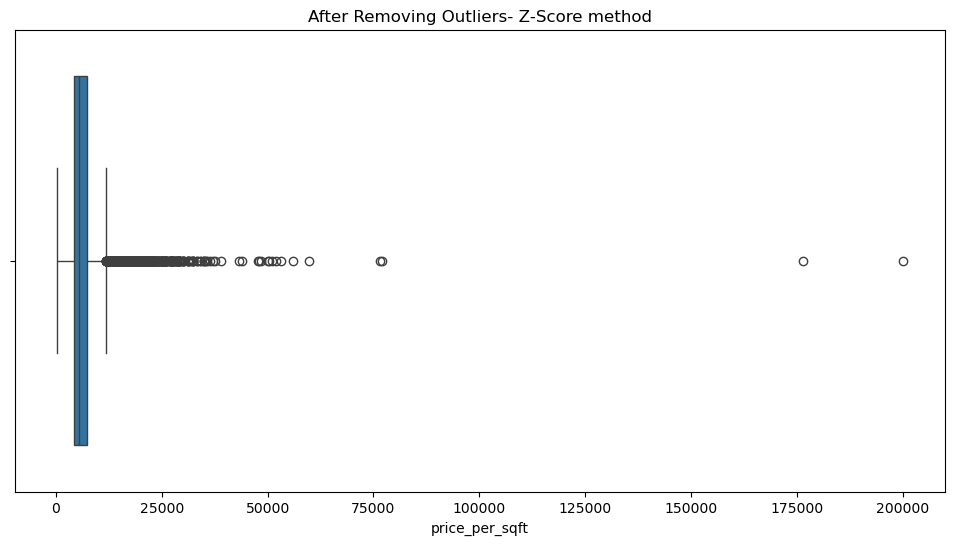

In [76]:
# After Z-Score method
plt.figure(figsize=(12,6))

sns.boxplot(x=df_trimmed_z['price_per_sqft'])
plt.title("After Removing Outliers- Z-Score method")
plt.show()

# 4 histplot to check the normality of the column

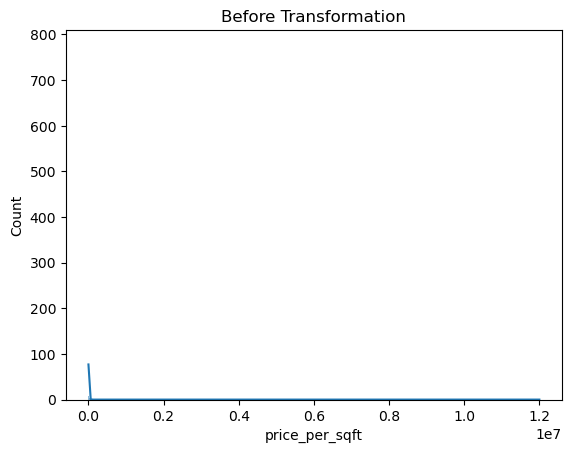

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


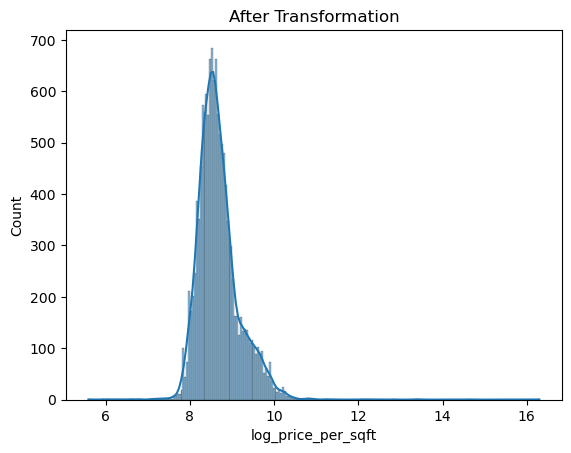

Skewness After: 1.4003259019533636
Kurtosis After: 9.203000543610957


In [95]:
# Orginal distribution
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Before Transformation")
plt.show()

# Skewness and Kurtosis

print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

# Applying transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

# After Transformation
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title("After Transformation")
plt.show()

# Skewness and Kurtosis after tranformation

print("Skewness After:", skew(df['log_price_per_sqft']))
print("Kurtosis After:", kurtosis(df['log_price_per_sqft']))


# 5 Correlation between all the numerical columns and plot heatmap

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

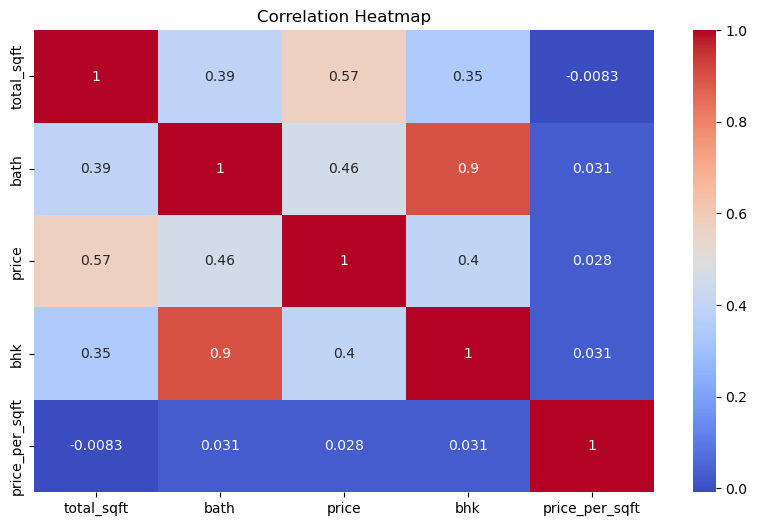

In [119]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 6 catter Plots Between Variables

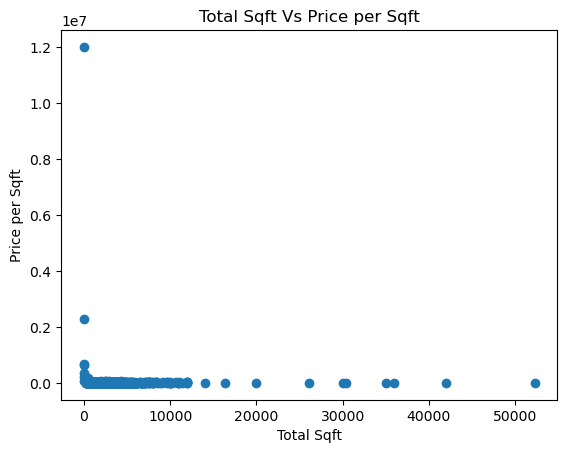

In [127]:
# Varibles taken total_Sqft and Price_per_sqft

plt.scatter(df['total_sqft'], df['price_per_sqft'])
plt.xlabel("Total Sqft")
plt.ylabel("Price per Sqft")
plt.title("Total Sqft Vs Price per Sqft")
plt.show()

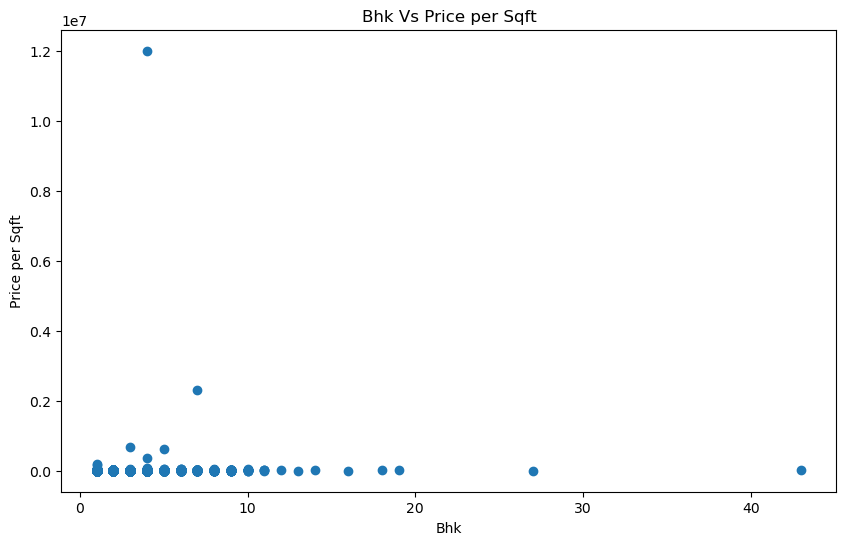

In [133]:
# Variables taken Bhk and Price_per_sqft
plt.figure(figsize=(10,6))

plt.scatter(df['bhk'], df['price_per_sqft'])
plt.xlabel("Bhk")
plt.ylabel("Price per Sqft")
plt.title("Bhk Vs Price per Sqft")
plt.show()